#1,Data Cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Loading files
election = pd.read_csv('Canadian_elections_2021.csv')
#tweets = pd.read_csv('sentiment_analysis.csv')

In [80]:
#Clean tweets need 5 hours so I save them to a new file and read as a new tweets
tweets = pd.read_csv('new_sentiment_analysis.csv')

In [3]:
election = election.replace(np.nan, '', regex=True)

In [4]:
election

,text,sentiment,negative_reason
0,The Canadian election is a power grab by PM Tr...,negative,calling election early
1,I do hope Trudeau loses the Canadian election ...,negative,covid
2,"Dear Canadians, This election is a test of how...",positive,
3,Canadian friends: Never forget that Trudeau ha...,negative,calling election early
4,Sorry @theJagmeetSingh I have voted #NDP all m...,positive,
...,...,...,...
997,This is absolutely horrible in Canada. The for...,negative,others
998,@davidakin Trudeau imposes gun control policie...,negative,gun control
999,In Canada 🇨🇦 our election is being stolen by t...,negative,others
1000,"O'Toole amends platform on gun control, but qu...",negative,tell lies


In [81]:
tweets

,Unnamed: 0,ID,text,label
0,0,7.680980e+17,josh jenkins looking forward tab breeders crow...,1
1,1,7.680980e+17,rt mianusmanjaved: congratulations pakistan be...,1
2,2,7.680980e+17,"rt pepalerts: september, yesmag taking maine m...",1
3,3,7.680980e+17,"rt david_gaibis: newly painted walls, thanks m...",1
4,4,7.680980e+17,rt cedricfeschotte: excited announce: july 201...,1
...,...,...,...,...
550386,550386,8.046170e+17,goddesses_o can't stop watching her...mm. more???,0
550387,550387,8.046180e+17,poor old tom odell look like would know wrong ...,0
550388,550388,8.046180e+17,antsmasher smashed 7 ants awesome gamehjfjfi,1
550389,550389,8.046180e+17,lizhudston kymwyllie evasmiless meanbok linddy...,1


In [5]:
import re
import html
import nltk
from nltk.tokenize import word_tokenize


In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
from nltk.corpus import stopwords

In [8]:
#Download stopword online from library
stop = stopwords.words('english')

In [11]:
def cleantweet(tweets):
    #Remove float
    if type(tweets) == np.float:
        return ""
    #Remove HTML tag
    pattern = re.compile(r'<[^>]+>')
    new_tweets = re.sub(pattern, '' , str(tweets))
    #Lower the letter
    new_tweets = new_tweets.lower()
    #Convert html to ASCII
    new_tweets = html.unescape(new_tweets)
    #Remove URL
    new_tweets=re.sub('(http|https|ftp)://[a-zA-Z0-9\\./]+','',new_tweets)
    #Remove stopword
    new_tweets1 = new_tweets.split()
    stopwords = stop
    new_tweets = [w for w in new_tweets1 if not w in stopwords]
    new_tweets = " ".join(word for word in new_tweets)
    return new_tweets

In [12]:
#Clean election
for i in range(0,len(election)):
    election.iloc[i,0] = cleantweet(election.iloc[i,0])
election.head()

,text,sentiment,negative_reason
0,canadian election power grab pm trudeau yes ta...,negative,calling election early
1,hope trudeau loses canadian election tomorrow ...,negative,covid
2,dear canadians election test progressive are. ...,positive,
3,canadian friends: never forget trudeau 2 years...,negative,calling election early
4,sorry thejagmeetsingh voted ndp life election ...,positive,


In [ ]:
#Clean tweets
for i in range(len(tweets)):
    tweets.iloc[i,1] = cleantweet(tweets.iloc[i]['text'])
    if i % 1000 == 0:
      print(i)
tweets.head()

In [13]:
#Clear the nan tweets with empty string
tweets = tweets.replace(np.nan, '', regex=True)

In [ ]:
#save new tweets since need 5 hours to clean once
tweets.to_csv('new_sentiment_analysis.csv')

# 2,Exploratory Data analysis

# 2.1 Relevent word and hastag

Liberal:Justin Trudeau\
Relevant word:Forward for everyone\
Hashtag:#justintrudeau#canada#trudeau@liberal_party

Conservative:Erin O'Toole\
Hashtag:@erinotoole@CPC_HQ,Conservatives,CPC,Conservative

NDP:Jagmeet Singh\
Relevant word:FightingForYou
Hashtag:@theJagmeetSingh,@NDP,@NPD_QG

PPC:MaximeBernier
Hashtag:@peoplespca,@MaximeBernier,@ppopulaireca


In [13]:
#Pick different party by key word
election["Liberal"] = election['text'].str.contains('justin|trudeau|justintrudeau|liberal|forwardforeveryone')
election["Conservative"] = election['text'].str.contains("erinotoole|conservative|cpc|o'toole")
election["NewDemocratic"] = election['text'].str.contains('jagmeet|singh|thejagmeetsingh|newdemocratic|ndp|fightingforyou')
election["PPC"] = election['text'].str.contains('maxime|bernier|maximebernier|ppopulaireca|peoplespca')
election["Other"] = election['text'].str.contains("justin|trudeau|justintrudeau|liberal|forwardforeveryone|erinotoole|o'toole|conservative|cpc|jagmeet|singh|thejagmeetsingh|newdemocratic|ndp|fightingforyou|maxime|bernier|maximebernier|ppopulaireca|peoplespca")

In [14]:
#Clear party columns
election.loc[election['Liberal']== True, 'Liberal'] = 'Liberal'
election.loc[election['Conservative']== True, 'Conservative'] = 'Conservative'
election.loc[election['NewDemocratic']== True, 'NewDemocratic'] = 'NewDemocratic'
election.loc[election['PPC']== True, 'PPC'] = 'PPC'
election.loc[election['Other']==False,'Other']= 'Other'
election.loc[election['Liberal']== False, 'Liberal'] = None
election.loc[election['Conservative']== False, 'Conservative'] = None
election.loc[election['NewDemocratic']== False, 'NewDemocratic'] = None
election.loc[election['PPC']== False, 'PPC'] = None
election.loc[election['Other']==True,'Other']=None

print(election['Liberal'].value_counts())
print(election['Conservative'].value_counts())
print(election['NewDemocratic'].value_counts())
print(election['PPC'].value_counts())
print(election['Other'].value_counts())

Liberal    486
Name: Liberal, dtype: int64
Conservative    253
Name: Conservative, dtype: int64
NewDemocratic    83
Name: NewDemocratic, dtype: int64
PPC    28
Name: PPC, dtype: int64
Other    338
Name: Other, dtype: int64


In [15]:
Liberal = election['Liberal']
Conservative = election['Conservative']
NewDemocratic = election['NewDemocratic']
PPC = election['PPC']
Other = election['Other']


In [16]:
import seaborn as sns

In [17]:
#Build a new pd that easy to draw
new_pd = pd.concat([Liberal,Conservative,NewDemocratic,PPC,Other])
new_pd1 = pd.DataFrame(new_pd,columns=['Election'])

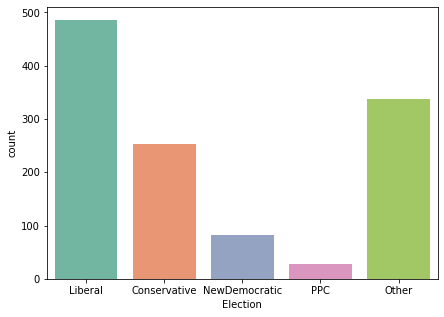

In [18]:
#Draw histogram of different party number
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(7,5)
sns.countplot(data = new_pd1, x = 'Election' , palette = 'Set2')

# 2.2 Word Cloud

In [73]:
from wordcloud import WordCloud

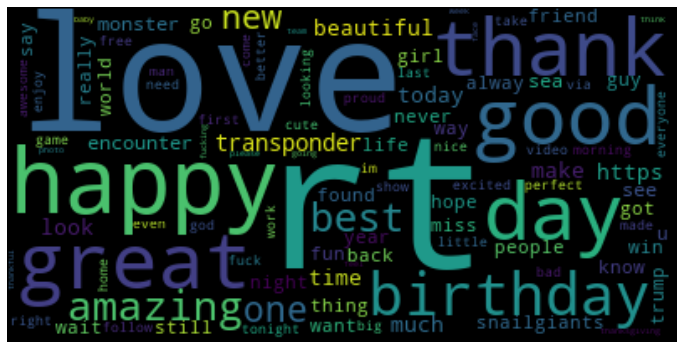

In [23]:
#Word Cloud for tweet
tweets_string="".join(tweets['text'])
wordcloud=WordCloud(max_words = 100, collocations=False).generate(tweets_string)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

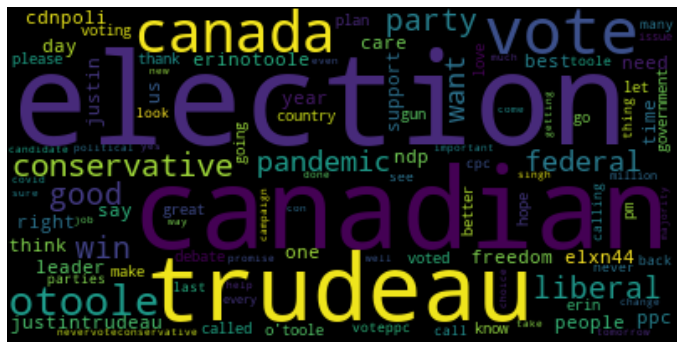

In [24]:
#Word Cloud for election
election_string="".join(election['text'])
wordcloud=WordCloud(max_words = 100, collocations=False).generate(election_string)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

After I draw the histogram of different political party I find that text relate to liberal party take the majority which is 486. And second majority is conservation party which is 253, and followed by NDP (83) and PPC is least which have only 28. And I got 338 that I cannot classify as any political party. This result is quite make sense since most of people in Canada support liberal. But the strange things is when I add them up the total number is exceed the total number of tweets in election; I found that because some tweets mention more than one party so being classify in both party. 
And I draw the word cloud for both tweets and election. For the election word cloud, except ‘election’,’canada’ those neutral word,’trudeau’ is the biggest word which is also claim that liberal have more related tweets in election.

# 3

In [20]:
from sklearn.model_selection import train_test_split 

In [15]:
tweets['label'].value_counts()

1    213061
0     62057
Name: label, dtype: int64

In [16]:
#Choose y and X
y = tweets['label']
X = tweets[['text']]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
#Word of bag
vectorizer1 = CountVectorizer()
vectorizer1.fit(X_train['text'])
X_train_bag = vectorizer1.transform(X_train['text'])
X_test_bag = vectorizer1.transform(X_test['text'])

In [31]:
#TFIDF
tf = TfidfVectorizer()
tf.fit(X_train['text'])
X_train_TF = tf.transform(X_train['text'])
X_test_TF = tf.transform(X_test['text'])

# Part4

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC
import xgboost as xgb

In [21]:
#Set of model, since svm is too slow so I run it isolate
models = {'lr': LogisticRegression(),'knn': KNeighborsClassifier(),'nb':MultinomialNB(),'dt': DecisionTreeClassifier(),'rf': RandomForestClassifier(),'XGB':xgb.XGBClassifier()}

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
def run_model(typ, model,X_train1,y_train1,X_test1,y_test1):

    
    # Initialize scaler
    scaler = StandardScaler(with_mean=False)

    X_train1 = scaler.fit_transform(X_train1)
    X_test1 = scaler.transform(X_test1)
        
    # Fit to training set
    model.fit(X_train1, y_train1)
        
    # Make predictions on testing set
    test_predictions = model.predict(X_test1)

    acc_test = accuracy_score(y_test1, test_predictions)

    print('Accuracy score for',typ,":",acc_test)
    
    return acc_test, model

In [28]:
#Accuracy for bag of word
for name, m in models.items():
    print ("Fitting " + name + " model")
    _, models[name] = run_model(name, m,X_train_bag,y_train,X_test_bag,y_test)

Fitting lr model


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy score for lr : 0.9408379373848987
Fitting knn model
Accuracy score for knn : 0.8557356789764466
Fitting nb model
Accuracy score for nb : 0.8258699234273529
Fitting dt model
Accuracy score for dt : 0.9500096927401377
Fitting rf model
Accuracy score for rf : 0.9640399340893671
Fitting XGB model
Accuracy score for XGB : 0.8269845885431811


In [ ]:
print ("Fitting " + 'svm' + " model")
Result = run_model('svm', SVC(),X_train_bag,y_train,X_test_bag,y_test)

Fitting svm model
Accuracy score for svm : 0.8685667219806441


In [ ]:
# Accuracy pf TFIDF
for name, m in models.items():
    print ("Fitting " + name + " model")
    _, models[name] = run_model(name, m,X_train_TF,y_train,X_test_TF,y_test)

Fitting lr model


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy score for lr : 0.9251807798059569
Fitting knn model
Accuracy score for knn : 0.7279400186533267
Fitting nb model
Accuracy score for nb : 0.8051756925350355
Fitting dt model
Accuracy score for dt : 0.9452573311207743
Fitting rf model
Accuracy score for rf : 0.9623481389067212
Fitting XGB model
Accuracy score for XGB : 0.8622984774524886


In [ ]:
print ("Fitting " + 'svm' + " model")
Result = run_model('svm', SVC(),X_train_TF,y_train,X_test_bag,y_test)

Fitting svm model
Accuracy score for svm : 0.8051756925350355


4aa

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
#Choosing random forest as model and transform with bag of word
y_raw = election['sentiment']
le = LabelEncoder()
# Converting string labels into numbers.
y=le.fit_transform(y_raw)

In [29]:
election['label1'] = y

In [30]:
X = election[['text']]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [32]:
vectorizer1 = CountVectorizer()
vectorizer1.fit(X_train['text'])
X_train_bag = vectorizer1.transform(X_train['text'])
X_test_bag = vectorizer1.transform(X_test['text'])

In [33]:
X_bag = vectorizer1.transform(X['text'])

In [34]:
scaler = StandardScaler(with_mean=False)
model = RandomForestClassifier()
X_train_bag = scaler.fit_transform(X_train_bag)
X_test_bag = scaler.transform(X_test_bag)
X_bag = scaler.transform(X_bag)       
# Fit to training set
model.fit(X_train_bag, y_train)
        
# Make predictions on testing set
test_predictions = model.predict(X_test_bag)
#Make prediction for whole data set
whole_predict = model.predict(X_bag)    
acc_test = accuracy_score(y_test, test_predictions)

print('Accuracy score',":",acc_test)
    


Accuracy score : 0.6976744186046512


4ab\
We can use classification_report or confusion matrix to evaluate the model. For confusion matrix, since it can performance measurement for assessing classification models. Therefore we can use this to evaluate the model. For classification_report, it is kind of summary, so it can show us the information more directly. 

4ac\
Base on my result, since my result are quite accurate(from graph) so I think NLP analysis is quite useful. It can be used to analysis the trend of different party support rate or dis-support rate. Also it can provide the negative reason(dis-support reason) which can help the party leader to improve themselves.\
For liberal, since there are a lot of people focus on this party, therefore the positive tweets and negative tweets for liberal both much. For conservative,the negative sentiment is less than positive sentiment. And for NDP and PPC the positive sentiment is much more than negative sentiment.\
To improve model accuracy we have plenty of ways, the simple ways is to imcrease the data size which mean to collect more tweets. The second way is we can use multilayer perceptron to train the data since MLP is more complicate which can work with non-linear seperable classification problem and multi-class classification problem therefore, it can improve our accuracy somehow.

In [35]:
election['pred'] = whole_predict

In [36]:
election['pred'].value_counts()

1    684
0    318
Name: pred, dtype: int64

In [37]:
liberal = election.loc[election['Liberal']=='Liberal']

<function matplotlib.pyplot.show>

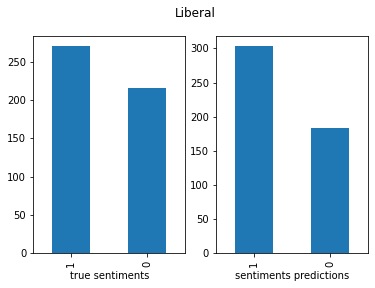

In [38]:
#Visualize liberal
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Liberal')
plt1 = plt.subplot(121) 
liberal['label1'].value_counts().plot.bar() 
plt1.set_xlabel('true sentiments')
plt.sca(plt1)

plt2 = plt.subplot(122)  
liberal['pred'].value_counts().plot.bar() 
plt2.set_xlabel('sentiments predictions')
plt.sca(plt2)
plt.show

In [39]:
Conservative = election.loc[election['Conservative']=='Conservative']

<function matplotlib.pyplot.show>

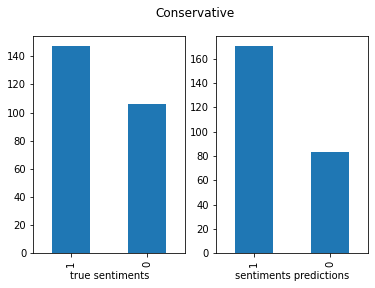

In [41]:
#Visualize Conservation
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Conservative')
plt1 = plt.subplot(121) 
Conservative['label1'].value_counts().plot.bar() 
plt1.set_xlabel('true sentiments')
plt.sca(plt1)

plt2 = plt.subplot(122)  
Conservative['pred'].value_counts().plot.bar() 
plt2.set_xlabel('sentiments predictions')
plt.sca(plt2)
plt.show

In [42]:
NDP = election.loc[election['NewDemocratic']=='NewDemocratic']

<function matplotlib.pyplot.show>

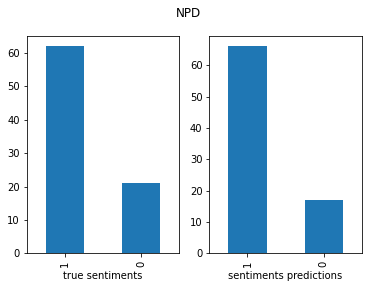

In [43]:
#Visualize NDP
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('NPD')
plt1 = plt.subplot(121) 
NDP['label1'].value_counts().plot.bar() 
plt1.set_xlabel('true sentiments')
plt.sca(plt1)

plt2 = plt.subplot(122)  
NDP['pred'].value_counts().plot.bar() 
plt2.set_xlabel('sentiments predictions')
plt.sca(plt2)
plt.show

In [44]:
PPC = election.loc[election['PPC']=='PPC']

<function matplotlib.pyplot.show>

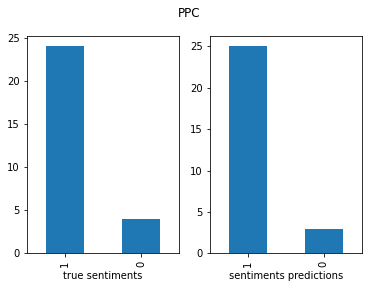

In [45]:
#Visualize PPC
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('PPC')
plt1 = plt.subplot(121) 
PPC['label1'].value_counts().plot.bar() 
plt1.set_xlabel('true sentiments')
plt.sca(plt1)

plt2 = plt.subplot(122)  
PPC['pred'].value_counts().plot.bar() 
plt2.set_xlabel('sentiments predictions')
plt.sca(plt2)
plt.show

# 4b
a)Probably since some word can present multiple meaning eg.killing and hate can be present in a positive tweets which is hard to classify. Also the words in tweets are lots some are not important like people's name which also affect computer classification.\
b)We can re-clean the data to clean the people name(eg.clean the word with first letter Upper but not in the head of sentence). Also we can increase the data size to help computer classify the sentiment.

In [46]:
negative=election['sentiment'].str.contains("negative")
new_df = election[negative]
new_df

,text,sentiment,negative_reason,Liberal,Conservative,NewDemocratic,PPC,Other,label1,pred
0,canadian election power grab pm trudeau yes ta...,negative,calling election early,Liberal,None,None,None,None,0,0
1,hope trudeau loses canadian election tomorrow ...,negative,covid,Liberal,None,None,None,None,0,1
3,canadian friends: never forget trudeau 2 years...,negative,calling election early,Liberal,None,None,None,None,0,0
5,vaccines guns key election o'toole serious pla...,negative,covid,None,Conservative,None,None,None,0,0
6,i’m sorry moderators respond leadership candid...,negative,others,None,None,None,None,Other,0,0
...,...,...,...,...,...,...,...,...,...,...
997,absolutely horrible canada. forthcoming electi...,negative,others,None,None,None,None,Other,0,1
998,davidakin trudeau imposes gun control policies...,negative,gun control,Liberal,None,None,None,None,0,0
999,canada 🇨🇦 election stolen thugs. uneducated go...,negative,others,None,None,None,None,Other,0,0
1000,o'toole amends platform gun control questions ...,negative,tell lies,None,Conservative,None,None,None,0,0


In [47]:
new_df['negative_reason'] = new_df['negative_reason'].astype('category')
new_df['negative_reason'].cat.categories

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Index(['calling election early', 'climate problem', 'covid ', 'economy',
       'gun control', 'healthcare and marijuana', 'others', 'scandal',
       'segregation', 'tell lies', 'women reproductive right and racism'],
      dtype='object')

In [48]:
X_1 = new_df['text'].values
y_1 = new_df['negative_reason'].values

In [49]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1,y_1,test_size=0.3, random_state=0)

In [50]:
#Use bag of word
vectorizer2 = CountVectorizer ()
vectorizer2.fit(X_train_1)
X_train_bag_1 = vectorizer2.transform(X_train_1)
X_test_bag_1 = vectorizer2.transform(X_test_1)

In [51]:
#I decide to use LR to classify the multiclass target and doing hyperparameter tuning
best_acc = 0
best_C = 0
best_solver = [0]
for C in [0.001,0.01,0.05,0.1,0.5,1,10,100]:
    for solver in ['newton-cg','lbfgs','liblinear','sag']:
      model = LogisticRegression(C=C, solver=solver)
      model.fit(X_train_bag_1,y_train_1)
      y_pred_1 = model.predict(X_test_bag_1)
      acc = accuracy_score(y_test_1,y_pred_1)
      if acc > best_acc:
        best_acc = acc
        best_C = C
        best_solver[0] = solver
        best_pred = y_pred_1

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

In [52]:
df_part4 = pd.DataFrame({'Original':y_test_1,'pred':best_pred})
df_part4

,Original,pred
0,healthcare and marijuana,others
1,economy,others
2,gun control,others
3,others,others
4,others,others
...,...,...
112,climate problem,others
113,scandal,others
114,calling election early,calling election early
115,calling election early,others


In [53]:
print('lr Accuracy: %.2f%%' % (best_acc*100))

lr Accuracy: 54.70%


4c\
I find that negative frequent word, except some neutral word, gun and pandemic are most frequent words. And for positive except for good, better those kind of word we got freedom as the most frequent word. Which means people vote for party may for freedom and don't vote for party may for gun and pandemic.

In [54]:
#Pick positive sentiment
positive=election['sentiment'].str.contains("positive")
new_df1 = election[positive]

In [55]:
new_df1

,text,sentiment,negative_reason,Liberal,Conservative,NewDemocratic,PPC,Other,label1,pred
2,dear canadians election test progressive are. ...,positive,,None,None,None,None,Other,1,0
4,sorry thejagmeetsingh voted ndp life election ...,positive,,None,None,NewDemocratic,PPC,None,1,1
8,canadians voteppc support maximebernier would ...,positive,,None,None,None,PPC,None,1,1
9,justin trudeau literally rocks thrown yet cont...,positive,,Liberal,None,None,None,None,1,1
12,throwbackthursday federal election debate nigh...,positive,,None,None,None,None,Other,1,1
...,...,...,...,...,...,...,...,...,...,...
938,election canadian freedom without freedom get ...,positive,,None,None,None,None,Other,1,1
940,progressive conservative government unfortunat...,positive,,Liberal,Conservative,None,None,None,1,1
943,last one night lookin like us ndp need rally b...,positive,,None,Conservative,NewDemocratic,None,None,1,1
969,justintrudeau killing i'd hate otoole right no...,positive,,Liberal,Conservative,None,None,None,1,1


In [56]:
new_df

,text,sentiment,negative_reason,Liberal,Conservative,NewDemocratic,PPC,Other,label1,pred
0,canadian election power grab pm trudeau yes ta...,negative,calling election early,Liberal,None,None,None,None,0,0
1,hope trudeau loses canadian election tomorrow ...,negative,covid,Liberal,None,None,None,None,0,1
3,canadian friends: never forget trudeau 2 years...,negative,calling election early,Liberal,None,None,None,None,0,0
5,vaccines guns key election o'toole serious pla...,negative,covid,None,Conservative,None,None,None,0,0
6,i’m sorry moderators respond leadership candid...,negative,others,None,None,None,None,Other,0,0
...,...,...,...,...,...,...,...,...,...,...
997,absolutely horrible canada. forthcoming electi...,negative,others,None,None,None,None,Other,0,1
998,davidakin trudeau imposes gun control policies...,negative,gun control,Liberal,None,None,None,None,0,0
999,canada 🇨🇦 election stolen thugs. uneducated go...,negative,others,None,None,None,None,Other,0,0
1000,o'toole amends platform gun control questions ...,negative,tell lies,None,Conservative,None,None,None,0,0


In [57]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [58]:
#Split the word and add them into the list
words = []
rows = new_df['text'].shape[0]
for i in range(rows):
  words.extend(new_df.iloc[i]['text'].split())


In [59]:
from nltk import FreqDist

In [60]:
# get the frequency of the word
fd = FreqDist(words)
freq_list = []
num = len(fd.values())
for i in range(num):
  freq_list.append([list(fd.keys())[i],list(fd.values())[i]])

In [61]:
freq = []
for i in range(len(freq_list)):
  freq.append(freq_list[i][1])


In [62]:
#Find the top50 most frequency word index
Freq = []
for i in range(50):
  max = np.max(freq)
  index = freq.index(max)
  Freq.append(index)
  freq[index] = 0

In [64]:
#Get the word by index
Freq_word_negative = []
for item in Freq:
  Freq_word_negative.append(freq_list[item][0])

In [65]:
Freq_word_negative

['election',
 'trudeau',
 'canadians',
 'otoole',
 'canadian',
 'canada',
 'election.',
 'justintrudeau',
 'like',
 'elxn44',
 'vote',
 'cdnpoli',
 'nevervoteconservative',
 'called',
 'erinotoole',
 'never',
 'get',
 'party',
 'pandemic',
 'gun',
 'pm',
 'justin',
 'would',
 'calling',
 "o'toole",
 'conservatives',
 'call',
 'one',
 'many',
 'erin',
 'care',
 'years',
 'canadians.',
 'going',
 'good',
 'people',
 'unnecessary',
 'think',
 'country',
 'say',
 'ppc',
 'bad',
 'wants',
 'want',
 'know',
 'liberals',
 'federal',
 'million',
 'liberal',
 'see']

In [66]:
#Do the same thing to the positive
words = []
rows = new_df1['text'].shape[0]
for i in range(rows):
  words.extend(new_df1.iloc[i]['text'].split())


In [67]:
fd = FreqDist(words)
freq_list = []
num = len(fd.values())
for i in range(num):
  freq_list.append([list(fd.keys())[i],list(fd.values())[i]])

In [68]:
freq = []
for i in range(len(freq_list)):
  freq.append(freq_list[i][1])


In [69]:
Freq = []
for i in range(50):
  max = np.max(freq)
  index = freq.index(max)
  Freq.append(index)
  freq[index] = 0

In [71]:
Freq_word_positive = []
for item in Freq:
  Freq_word_positive.append(freq_list[item][0])

In [72]:
Freq_word_positive

['election',
 'canadian',
 'vote',
 'trudeau',
 'canadians',
 'otoole',
 'canada',
 'election.',
 'good',
 'elxn44',
 'federal',
 'party',
 'get',
 'win',
 'like',
 'cdnpoli',
 'ppc',
 'best',
 'justintrudeau',
 'voteppc',
 'erinotoole',
 'would',
 'freedom',
 'us',
 'ndp',
 'better',
 'great',
 'want',
 'need',
 'support',
 'day',
 'voting',
 'hope',
 'justin',
 'love',
 'right',
 'voted',
 'time',
 'liberal',
 'voteliberal',
 'one',
 'think',
 'conservative',
 'make',
 'people',
 'please',
 'go',
 'parties',
 'cpc',
 'conservatives']